# **IMPORT DATASET**

First, we need to import the dataset which we have obtained from HPC Lab into this notebook. This dataset consists of information about undergraduate students from 2006 to 2017 of Ho Chi Minh University of Technology (HCMUT).

The dataset has been cleaned before, in which every "FAILED" score (final score is less than 3 or greater than 10) had been eliminated from the dataset.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
df = pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/data.csv')

df.head(5)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,NHHK,MAMH,TENMHVN,MANH,F_TO,F_MAKH,F_TENLOP,F_MANG,F_TENNGVN,...,TILEBT,BTLDA,TILEBTLDA,TN,TILETN,THI,TILETHI,TKET,F_DIEM1,F_DIEM2
0,0,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,3.0,60.0,4.0,0.0,0.0
1,1,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK02,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,5.0,60.0,6.0,0.0,0.0
2,2,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,8.5,60.0,8.5,0.0,0.0
3,3,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,4.0,60.0,4.0,0.0,0.0
4,4,151,1001,Những ngLý cơbản cn M-Lê,A02,A,CK,CK13CK05,CKI,Cơ khí-Cơ điện tử,...,0.0,0.0,0.0,0.0,0.0,9.5,60.0,9.5,0.0,0.0


However, in this notebook, we will not use every information of the dataset. We will mostly use the course IDs ('MAMH'), the students' IDs ('MASV') and the final score of each student ('TKET').

And we will not evaluate every faculty but mainly focus on several faculties (specifically 'CK' and 'MT').

In [3]:
# Change the course IDs from 'int' type to 'str' type for easy acccess

df['MAMH'] = df['MAMH'].astype(str)

In [4]:
# Filter the data to only get the students from "CO KHI" faculty

data = df[["MASV", "MAMH", "F_MAKH", "TKET"]]
data = data.loc[data["F_MAKH"] == "CK"]
print(data)

            MASV    MAMH F_MAKH  TKET
0       35901769    1001     CK   4.0
1       25544259    1001     CK   6.0
2       91548064    1001     CK   8.5
3       49454626    1001     CK   4.0
4        6205835    1001     CK   9.5
...          ...     ...    ...   ...
469704  18171600  MT1009     CK   7.0
469746  61938407  MT1009     CK   7.5
470250  79242206  MT1009     CK   8.0
470254   1703259  MT1009     CK   7.5
470257  83723154  MT1009     CK   0.0

[75043 rows x 4 columns]


# **CREATING A USER-ITEM MATRIX**


After filtering the data we want, we need to create a user-item collaborating matrix with the users are the students, the items are the courses and each value is the score of each student in the corresponding course.

In [5]:
# We can know the number of users and items in the filtered data

n_users = data.MASV.unique().shape[0]
n_items = data.MAMH.unique().shape[0]
print (str(n_users) + ' users')
print (str(n_items) + ' items')

3747 users
477 items


In [6]:
# Creating a user-item matrix

data_matrix = data.pivot_table(index = "MAMH", columns = "MASV", values="TKET")
data_matrix

MASV,10330,26064,84933,105160,108212,110657,150489,158039,187530,216253,...,99608090,99640618,99718901,99831874,99832459,99862192,99893459,99950499,99959958,99968001
MAMH,,,,,,,,,,,,,,,,,,,,,
1001,NaN,NaN,NaN,NaN,NaN,6.5,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN
1004,NaN,NaN,NaN,NaN,NaN,7.0,7.5,NaN,5.5,NaN,...,NaN,NaN,NaN,NaN,7.0,NaN,NaN,8.5,NaN,NaN
1025,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200036,NaN,NaN,NaN,NaN,NaN,8.5,9.0,NaN,8.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200037,NaN,NaN,NaN,NaN,NaN,7.5,8.0,NaN,8.5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP1021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SP1023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN
SP1025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are a lot of NaN values in the matrix, which make the sparsity of the dataset very high.

We can calculate the sparsity of the dataset as the following:

In [7]:
sparsity = float(data_matrix.isna().sum().sum())
sparsity /= (data_matrix.shape[0] * data_matrix.shape[1])
sparsity *= 100
print ('Sparsity: {:4.2f}%'.format(sparsity))

Sparsity: 96.05%


When dealing with a dataset with a high sparsity like this, there are a few solutions that we can use:


*   Replace all the NaN values with the mean of all values in one particular column/row.
*   Replace all the NaN values with the value 0.

We can try both solutions and calculate the MSE and RMSE of both of them.




In [8]:
# Replace the NaN values with the value 0

final_data_matrix = data_matrix.fillna(0)
final_data_matrix

MASV,10330,26064,84933,105160,108212,110657,150489,158039,187530,216253,...,99608090,99640618,99718901,99831874,99832459,99862192,99893459,99950499,99959958,99968001
MAMH,,,,,,,,,,,,,,,,,,,,,
1001,0.0,0.0,0.0,0.0,0.0,6.5,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0
1004,0.0,0.0,0.0,0.0,0.0,7.0,7.5,0.0,5.5,0.0,...,0.0,0.0,0.0,0.0,7.0,0.0,0.0,8.5,0.0,0.0
1025,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200036,0.0,0.0,0.0,0.0,0.0,8.5,9.0,0.0,8.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200037,0.0,0.0,0.0,0.0,0.0,7.5,8.0,0.0,8.5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SP1021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SP1023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0
SP1025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# **SPLITTING THE DATA**

We split the data matrix into two different sets: training set and testing test.

The ratio of the testingset : training set will be 2:8.

In [9]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(final_data_matrix, test_size=0.2, random_state=25)

print(f"Number of training examples: {train.shape[0]}")
print(f"Number of testing examples: {test.shape[0]}")

Number of training examples: 381
Number of testing examples: 96


# **IMPLEMENT THE COLLABORATIVE FILTERING ALGORITHM**

At the moment, we have the `final_data_matrix` dataframe with the 477 rows as 477 different items and 3747 columns as 3747 different users.

When we use the `cosine_similarity` function from `sklearn`, the result can be a square matrix consists of the similarities between items to items or between users to users. (This depends on whether the inputs are the transpose matrices of the `final_data_matrix` or not)



In [10]:
# Define function to return a similarity matrix between user-user or item-item

from sklearn.metrics.pairwise import cosine_similarity

def get_similarity (data, kind='user'):
  if kind == 'user':
    similarity = cosine_similarity(data.T, data.T)
  elif kind == 'item':
    similarity = cosine_similarity(data, data)
  return similarity

In [11]:
# This matrix shows the similarities between users to users

eg = get_similarity(final_data_matrix, kind='user')
eg = pd.DataFrame(eg)


With our similarity matrix in hand, we can now predict the ratings that were not included with the data. Using these predictions, we can then compare them with the test data to attempt to validate the quality of our recommender model.

For user-based collaborative filtering, we predict that a user’s score in a course is given by the weighted sum of all other users’ scores for that course where the weighting is the cosine similarity between the each user and the input user.


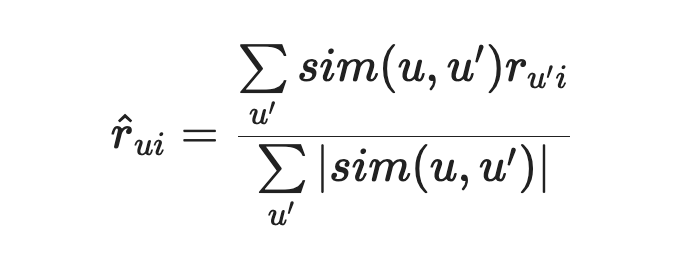

In [12]:
# Define function to predict the scores using weighted sum

def predict(data, similarity, kind='user'):
    if kind == 'item':
        return similarity.dot(data) / np.array([np.abs(similarity).sum(axis=1)]).T
    elif kind == 'user':
        return data.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])

# **EVALUATING THE RESULTS**

In [13]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
  pred = pred.fillna(0)
  actual = actual.fillna(0)
  return mean_squared_error(pred, actual)

def get_rmse(pred, actual):
  pred = pred.fillna(0)
  actual = actual.fillna(0)
  return mean_squared_error(pred, actual, squared= False)

In [14]:
user_similarity = get_similarity(train, kind='user')
item_similarity = get_similarity(test, kind='item')

In [15]:
item_prediction = predict(test, item_similarity, kind='item')
user_prediction = predict(train, user_similarity, kind='user')


print ('User-based CF MSE: ' + str(get_mse(user_prediction, train)))
print ('Item-based CF MSE: ' + str(get_mse(pd.DataFrame(item_prediction), test)))
print ('-'*10)
print ('User-based CF RMSE: ' + str(get_rmse(user_prediction, train)))
print ('Item-based CF RMSE: ' + str(get_rmse(pd.DataFrame(item_prediction), test)))
print ('-'*10)

User-based CF MSE: 0.9643452126877761
Item-based CF MSE: 0.6124812007875092
----------
User-based CF RMSE: 0.9267783587638844
Item-based CF RMSE: 0.682758238883658
----------


In [16]:
user_prediction

,0,1,2,3,4,5,6,7,8,9,...,3737,3738,3739,3740,3741,3742,3743,3744,3745,3746
MAMH,,,,,,,,,,,,,,,,,,,,,
ME2021,3.652392,2.168181,NaN,0.014638,0.016627,0.021838,0.020099,1.396227,0.020702,1.536757,...,0.00565,1.373827,1.411481,3.714679,0.007879,0.935065,0.041474,0.288443,3.639882,2.531789
204104,0.000000,0.000266,NaN,0.000000,0.111194,0.050764,0.061621,0.000000,0.052942,0.000608,...,0.00000,0.000371,0.000916,0.000000,0.042868,0.000000,0.042023,0.404304,0.000303,0.000272
7001,0.009137,0.010179,NaN,0.040505,0.068740,0.083347,0.082372,0.011035,0.083790,0.015651,...,0.04813,0.011149,0.011517,0.008133,0.060194,0.006181,0.123874,0.087068,0.010670,0.009688
ME2077,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SP1023,0.000000,0.008232,NaN,0.000000,0.000000,0.000000,0.000000,0.010655,0.000000,0.009041,...,0.00000,0.011397,0.010900,0.000000,0.000000,0.187601,0.000000,0.002324,0.000000,0.006091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806702,0.000138,0.000450,NaN,0.000000,0.000000,0.000824,0.001243,0.000424,0.000787,0.000374,...,0.00000,0.000580,0.000646,0.000139,0.001113,0.000000,0.000000,0.002461,0.000118,0.000478
210701,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
SP1025,0.000000,0.009356,NaN,0.000000,0.000000,0.000000,0.000000,0.012761,0.000000,0.009208,...,0.00000,0.012631,0.011937,0.000000,0.000000,0.065973,0.000000,0.002134,0.000000,0.006288
